In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

In [2]:
df = pd.read_csv('5_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.974943,-0.574685,-0.171987,-0.076262,-0.929922,-0.520882,-0.620636,-1.341167,-0.826579,-1.031577,1.546232,0
1,1.540782,1.740083,-0.386234,1.803020,-1.078837,-0.520882,-0.620636,1.575614,-0.826579,-0.708126,-0.911406,1
2,-0.482387,-0.574685,-0.171987,-1.280554,-1.015446,-0.520882,1.566629,0.288208,-0.826579,-1.031577,1.546232,0
3,-1.207789,1.740083,-0.906213,0.286790,-0.277050,-0.520882,-0.620636,0.736012,1.226487,1.898429,-0.911406,1
4,1.706872,-0.574685,-0.386234,-0.911049,-1.121848,-0.520882,-0.620636,0.454620,-0.826579,-1.031577,1.546232,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,0.974943,-0.574685,-0.171987,-0.076262,-0.929922,-0.520882,-0.620636,-1.341167,-0.826579,-1.031577,1.546232
1,1.540782,1.740083,-0.386234,1.803020,-1.078837,-0.520882,-0.620636,1.575614,-0.826579,-0.708126,-0.911406
2,-0.482387,-0.574685,-0.171987,-1.280554,-1.015446,-0.520882,1.566629,0.288208,-0.826579,-1.031577,1.546232
3,-1.207789,1.740083,-0.906213,0.286790,-0.277050,-0.520882,-0.620636,0.736012,1.226487,1.898429,-0.911406
4,1.706872,-0.574685,-0.386234,-0.911049,-1.121848,-0.520882,-0.620636,0.454620,-0.826579,-1.031577,1.546232
...,...,...,...,...,...,...,...,...,...,...,...
4039,-0.098635,1.740083,-0.386234,-0.445767,1.402108,-0.520882,-0.620636,0.848705,-0.826579,1.898429,-0.911406
4040,1.374691,1.740083,-0.386234,-0.757704,0.087178,-0.520882,1.566629,-0.499279,-0.826579,-0.242279,-0.911406
4041,1.729394,-0.574685,1.709249,1.121577,-0.266610,-0.520882,1.566629,-0.724665,1.226487,-1.031577,-0.197682
4042,-0.664474,-0.574685,-0.906213,1.803020,-0.010039,-0.520882,-0.620636,1.296509,-0.826579,-1.031577,-0.197682


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
4039,1
4040,1
4041,0
4042,0


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1880
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

accuracies_nb:  [0.734065934065934, 0.7419653893695921, 0.7417873542917697, 0.7531932426864442, 0.7532146389713156, 0.757725587144623, 0.7668863261943987, 0.7861557478368356, 0.7876543209876543]
positive_predictive_values_nb:  [0.7385257301808067, 0.7418688693856479, 0.7515188335358445, 0.7615330021291696, 0.7607413647851727, 0.7551440329218106, 0.7652645861601085, 0.8012422360248447, 0.7943548387096774]
recalls_nb:  [0.7976965448172258, 0.8109480812641083, 0.7934573444515716, 0.8031437125748503, 0.8076923076923077, 0.8265765765765766, 0.8367952522255193, 0.834051724137931, 0.8491379310344828]
f1_scores_nb:  [0.7669715936446798, 0.7748719331356161, 0.7719188767550702, 0.7817850637522769, 0.7835140997830803, 0.789247311827957, 0.7994330262225372, 0.8173178458289335, 0.8208333333333333]
specificities_nb:  [0.6567255021302495, 0.6584699453551912, 0.6784591194968553, 0.692025664527956, 0.6858407079646017, 0.673972602739726, 0.6796296296296296, 0.7217391304347827, 0.7052023121387283]
npvs_n

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 4749
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.7436813186813187, 0.7873918417799752, 0.8089014482515012, 0.8323032550473836, 0.8738872403560831, 0.8967861557478368, 0.9069192751235585, 0.9295426452410384, 0.9555555555555556]
positive_predictive_values_dtc:  [0.7489300998573466, 0.8020419739081112, 0.815224463240078, 0.8520849724626278, 0.8881640260950606, 0.9117305458768873, 0.9227129337539433, 0.9408983451536643, 0.9847715736040609]
recalls_dtc:  [0.7954545454545454, 0.8066172276098118, 0.8298013245033112, 0.8317972350230415, 0.8759191176470589, 0.8961187214611872, 0.901386748844376, 0.9255813953488372, 0.9282296650717703]
f1_scores_dtc:  [0.7714915503306392, 0.8043230944254836, 0.8224483098129307, 0.841818888457054, 0.8819990745025451, 0.9038572251007484, 0.911925175370226, 0.9331770222743259, 0.9556650246305419]
specificities_dtc:  [0.6819277108433734, 0.7646662171274443, 0.785011355034065, 0.8328888888888889, 0.8715203426124197, 0.8975741239892183, 0.9132743362831859, 0.9340369393139841, 0.9846938775510204]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 530
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 

accuracies_rf:  [0.8129120879120879, 0.8442521631644005, 0.8703638290356764, 0.8912237330037083, 0.904055390702275, 0.9184177997527813, 0.9406919275123559, 0.9555006180469716, 0.9604938271604938]
positive_predictive_values_rf:  [0.8216374269005848, 0.8615644344400676, 0.8770491803278688, 0.9021339220014717, 0.9277326106594399, 0.9388209121245829, 0.9565217391304348, 0.9801324503311258, 0.9741379310344828]
recalls_rf:  [0.8425787106446777, 0.8557853549468977, 0.889955214331414, 0.9034635224760501, 0.9000876424189308, 0.9163952225841476, 0.9401709401709402, 0.9426751592356688, 0.9576271186440678]
f1_scores_rf:  [0.8319763138415989, 0.8586651710600112, 0.8834550651000318, 0.9027982326951399, 0.9137010676156584, 0.9274725274725275, 0.9482758620689655, 0.961038961038961, 0.9658119658119658]
specificities_rf:  [0.776693105552166, 0.8299930891499654, 0.8462145110410094, 0.8757009345794392, 0.9091940976163451, 0.921090387374462, 0.94140625, 0.9733727810650887, 0.9644970414201184]
npvs_rf:  [0.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 964
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was pas

accuracies_knn:  [0.7162087912087912, 0.7255871446229913, 0.7329565524549629, 0.7507210548001648, 0.7581602373887241, 0.7719406674907293, 0.770181219110379, 0.7812113720642769, 0.7975308641975308]
positive_predictive_values_knn:  [0.7506387327542157, 0.748898678414097, 0.7591656131479141, 0.7738876732312181, 0.78868258178603, 0.7934782608695652, 0.7870239774330042, 0.7974683544303798, 0.8144796380090498]
recalls_knn:  [0.7293942403177756, 0.7589285714285714, 0.7620558375634517, 0.782448377581121, 0.7810858143607706, 0.8030803080308031, 0.8134110787172012, 0.8235294117647058, 0.8144796380090498]
f1_scores_knn:  [0.7398640141022412, 0.753880266075388, 0.7606079797340088, 0.7781444811147782, 0.7848658161020677, 0.7982504100601422, 0.8, 0.8102893890675241, 0.8144796380090498]
specificities_knn:  [0.6998769987699877, 0.6842105263157895, 0.6964143426294821, 0.7105508870214753, 0.7284090909090909, 0.7320169252468265, 0.7140151515151515, 0.7257142857142858, 0.7771739130434783]
npvs_knn:  [0.67

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 2600
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

accuracies_svm:  [0.75, 0.7707045735475896, 0.7732250088308018, 0.7849196538936959, 0.7987141444114738, 0.8053152039555006, 0.8105436573311368, 0.8133498145859085, 0.8246913580246914]
positive_predictive_values_svm:  [0.7604166666666666, 0.7724425887265136, 0.7632794457274826, 0.7879834254143646, 0.797716150081566, 0.818848167539267, 0.8093333333333333, 0.822, 0.8380566801619433]
recalls_svm:  [0.7990049751243781, 0.8286674132138858, 0.8507078507078507, 0.8414454277286135, 0.8601583113456465, 0.8463203463203464, 0.8746397694524496, 0.86892177589852, 0.8697478991596639]
f1_scores_svm:  [0.7792333818534692, 0.7995678011885468, 0.8046256847230676, 0.8138373751783167, 0.8277613203554803, 0.8323576370409792, 0.8407202216066482, 0.8448098663926003, 0.8536082474226804]
specificities_svm:  [0.6895705521472393, 0.6993103448275862, 0.6789350039154268, 0.7133520074696545, 0.7197740112994351, 0.7507204610951008, 0.725, 0.7351190476190477, 0.7604790419161677]
npvs_svm:  [0.7356020942408377, 0.76818

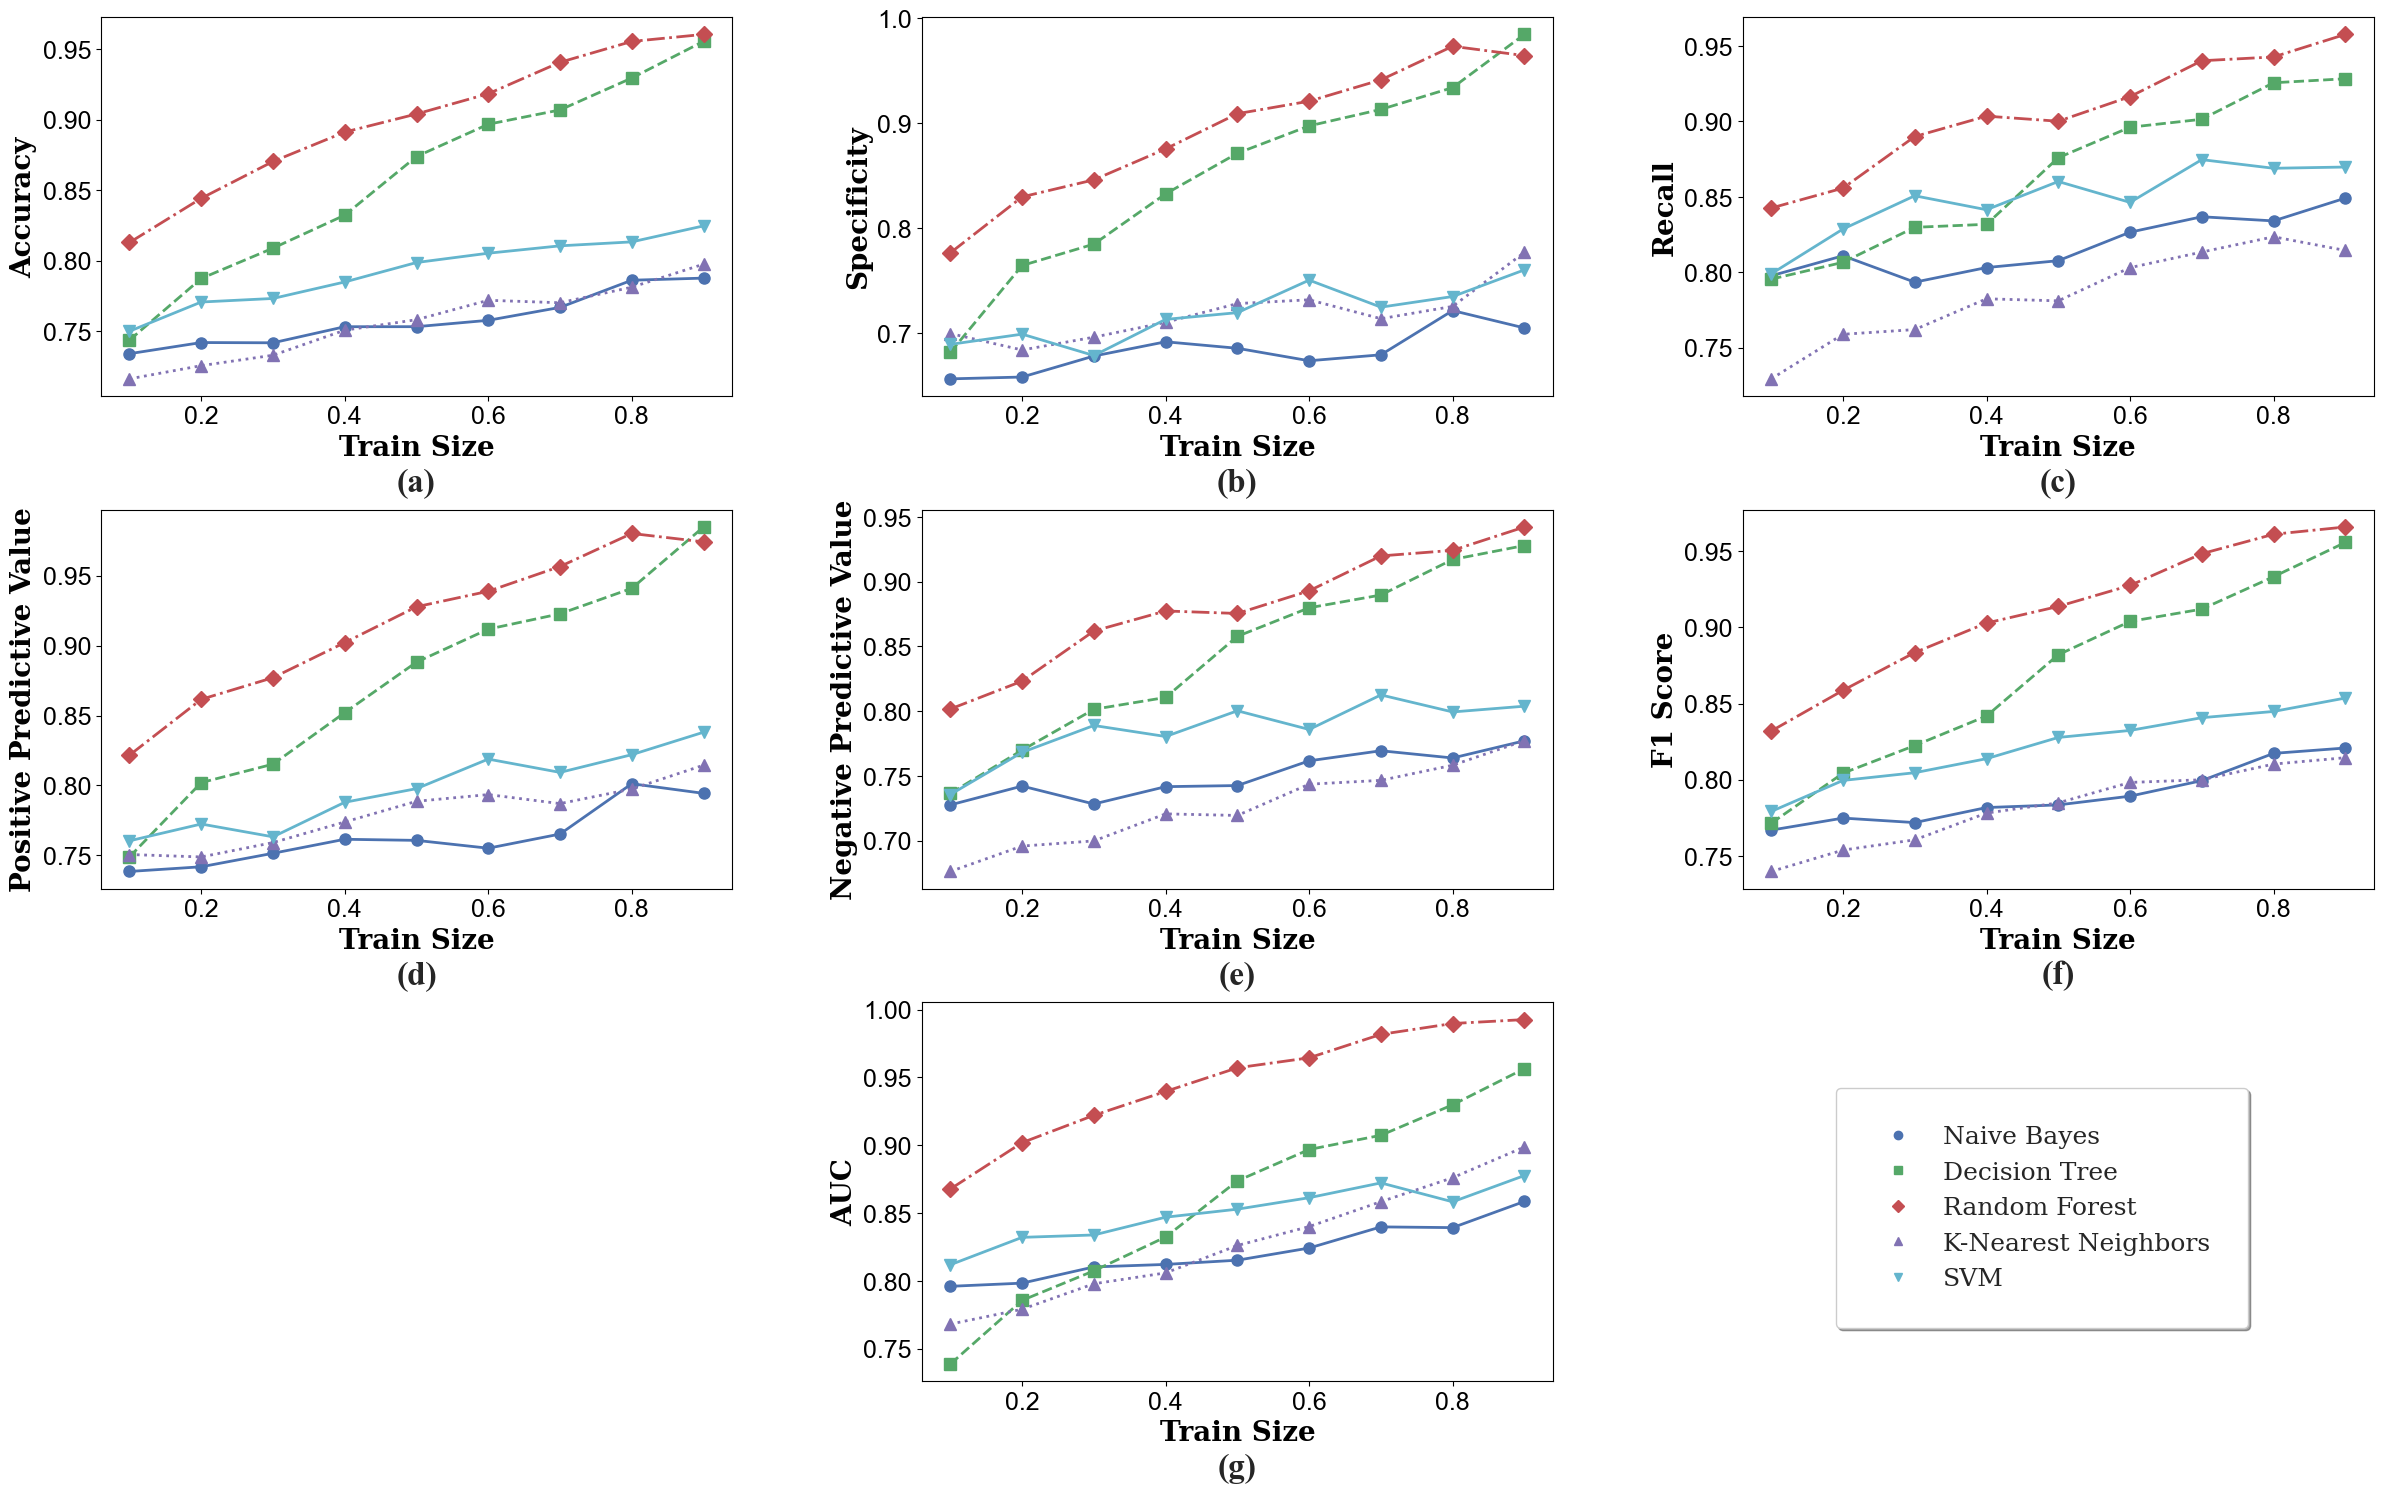

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(24, 15))  # Adjusted figsize for better fit
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=20, fontweight='bold', family='serif')

# Add label (a)
axes[0, 0].text(0.5, -0.25, '(a)', transform=axes[0, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=20, fontweight='bold', family='serif')

# Add label (b)
axes[0, 1].text(0.5, -0.25, '(b)', transform=axes[0, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=20, fontweight='bold', family='serif')

# Add label (c)
axes[0, 2].text(0.5, -0.25, '(c)', transform=axes[0, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[1, 0].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Positive Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (d)
axes[1, 0].text(0.5, -0.25, '(d)', transform=axes[1, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 1].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('Negative Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (e)
axes[1, 1].text(0.5, -0.25, '(e)', transform=axes[1, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 2].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('F1 Score', fontsize=20, fontweight='bold', family='serif')

# Add label (f)
axes[1, 2].text(0.5, -0.25, '(f)', transform=axes[1, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[2, 1].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[2, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[2, 1].set_ylabel('AUC', fontsize=20, fontweight='bold', family='serif')

# Add label (g)
axes[2, 1].text(0.5, -0.25, '(g)', transform=axes[2, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Hide any unused subplots
axes[2, 0].axis('off')
axes[2, 2].axis('off')

# Create a dummy plot to include the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(.95, 0.03), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 18, 'family': 'serif'})
dummy_plot.axis('off')  # Hide the axis for the dummy plot

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('Images/6_ml_classifier_metrics.png', transparent=True)
# Show plot
plt.show()

In [11]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) / 9)
print('dtc: ', sum(accuracies_dtc) / 9)
print('rf: ', sum(accuracies_rf) / 9)
print('knn: ', sum(accuracies_knn)/ 9)
print('svm: ', sum(accuracies_svm) / 9)

Average Accuracy: 
nb:  0.7580720601720631
dtc:  0.8594409706426945
rf:  0.8997679306989722
knn:  0.7560553225931722
svm:  0.792384823842311


In [12]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) / 9)
print('dtc: ', sum(specificities_dtc) / 9)
print('rf: ', sum(specificities_rf) / 9)
print('knn: ', sum(specificities_knn) / 9)
print('svm: ', sum(specificities_svm) / 9)

Average Specificity: 
nb:  0.6835627349353022
dtc:  0.8517326435159555
rf:  0.8931291330887325
knn:  0.718709124573952
svm:  0.7191400522544064


In [13]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) / 9)
print('dtc: ', sum(recalls_dtc) / 9)
print('rf: ', sum(recalls_rf) / 9)
print('knn: ', sum(recalls_knn) / 9)
print('svm: ', sum(recalls_svm) / 9)

Average Recall: 
nb:  0.8177221638638416
dtc:  0.8656562201071044
rf:  0.9054154317169772
knn:  0.7853792530859389
svm:  0.8488459743279283


In [14]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) / 9)
print('dtc: ', sum(positive_predictive_values_dtc) / 9)
print('rf: ', sum(positive_predictive_values_rf) / 9)
print('knn: ', sum(positive_predictive_values_knn) / 9)
print('svm: ', sum(positive_predictive_values_svm) / 9)

Average PPV: 
nb:  0.7633548326481202
dtc:  0.8740621037724199
rf:  0.9155256229944508
knn:  0.7793026122306083
svm:  0.7966751619612374


In [15]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) / 9)
print('dtc: ', sum(npvs_dtc) / 9)
print('rf: ', sum(npvs_rf) / 9)
print('knn: ', sum(npvs_knn) / 9)
print('svm: ', sum(npvs_svm) / 9)

Average NPV: 
nb:  0.7504443931593944
dtc:  0.8433859605286297
rf:  0.8798344288946472
knn:  0.7263598679157997
svm:  0.7860882843609382


In [16]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) / 9)
print('dtc: ', sum(f1_scores_dtc) / 9)
print('rf: ', sum(f1_scores_rf) / 9)
print('knn: ', sum(f1_scores_knn) / 9)
print('svm: ', sum(f1_scores_svm) / 9)

Average F1-Score: 
nb:  0.7895436760314983
dtc:  0.8696339294338328
rf:  0.9103550185227621
knn:  0.7822646660294666
svm:  0.8218357261957542


In [17]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) / 9)
print('dtc: ', sum(aucs_dtc) / 9)
print('rf: ', sum(aucs_rf) / 9)
print('knn: ', sum(aucs_knn) / 9)
print('svm: ', sum(aucs_svm) / 9)

Average AUC: 
nb:  0.8215368962140793
dtc:  0.8586944318115299
rf:  0.9463290726665006
knn:  0.8278109236309109
svm:  0.8496810228084359
